# 독립 표본 T검정

In [1]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
from hossam import load_data
from pandas import DataFrame, melt
from math import sqrt

from scipy.stats import t, normaltest, bartlett, levene, ttest_ind
from statannotations.Annotator import Annotator

## 그래프 초기화

In [3]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

## 예제 - 1

In [4]:
origin = load_data('styptic')
origin

[data] https://data.hossam.kr/data/lab10_/styptic.xlsx
[desc] 실험 참가자를 두 그룹으로 임의 분할한 후 피부에 작은 상처를 내어 피가 흐르게 한 다음, 한 그룹에는 지혈제 B를 다른 그룹에는 지혈제 G를 투여하여 완전히 지혈될 때 까지의 시간(분)을 측정한 두 종료의 지혈제 효과를 측정한 자료 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,B,G
0,8.80,9.9
1,8.90,10.0
2,8.40,9.0
3,7.90,11.1
4,8.20,9.8
5,8.70,9.6
6,7.90,10.3
7,9.10,8.7
8,9.60,10.4
9,8.75,9.5


## 신뢰구간 확인

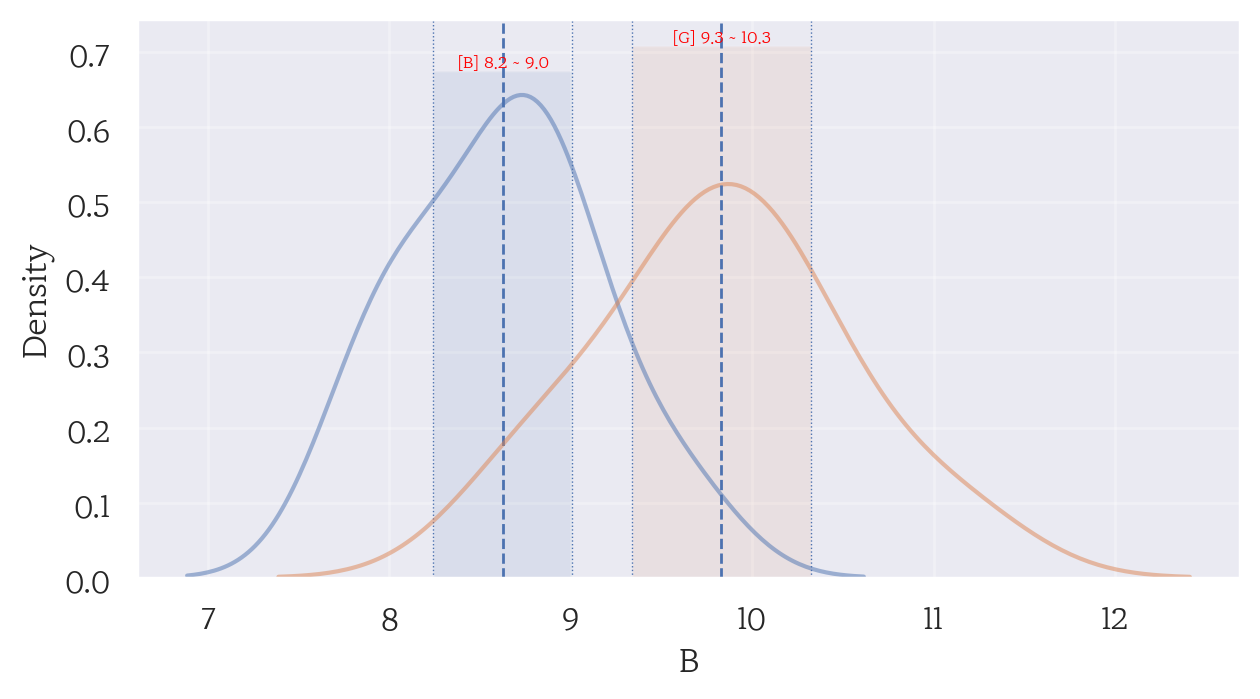

In [8]:
data = origin[['B', 'G']] # 확인할 데이터

# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 720 # 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
# KDE Plot 그리기
 sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

# 신뢰구간
 max = data[c].max() # 최대값
 clevel = 0.95 # 신뢰수준
 dof = len(data[c]) - 1 # 자유도
 sp_mean = data[c].mean() # 표본평균
 sp_std = data[c].std(ddof=1) # 표본표준편차
 sp_std_error = sp_std / sqrt(len(data[c])) # 표본표준오차
 cmin, cmax = t.interval(clevel, dof, loc=sp_mean, 
              scale=sp_std_error)
 ax.axvline(cmin, linestyle=':', linewidth=0.5)
 ax.axvline(cmax, linestyle=':', linewidth=0.5)

# 평균 표시
 ymin, ymax = ax.get_ylim()
 ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
 ax.axvline(sp_mean, linestyle='--', linewidth=1)

# 텍스트 그리기
 ax.text(x=(cmax-cmin)/2+cmin,
         y=ymax,
         s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
         horizontalalignment="center",
         verticalalignment="bottom",
         fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3) # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료

In [11]:
data = origin[['B', 'G']] # 검사하려는 데이터 추출
equal_var_fields = []
normal_dist = True
report = []
for c in data.columns:
    s, p = normaltest(data[c])
    
    normalize = p > 0.05
    report.append({
         "field": c,
         "statistic": s,
         "p-value": p,
         "result": normalize
    })
    normal_dist = normal_dist and normalize

# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
# 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T) # 모든 컬럼의 데이터를 한번에 전달

    else:
        n = "Levene" # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center='median') # 모든 컬럼의 데이터를 한번에 전달
   
    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
   })
report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
B,0.083269,0.959221,True
G,0.200950,0.904408,True
Bartlett,0.555515,0.456073,True


## 두 그룹간 평균에 차이 검정

In [13]:
s, p = ttest_ind(origin['B'],origin['G']) # '제시된 값', alternative = 'less, greater')       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: -4.350, p-value: 0.000, 대립가설 채택'

In [14]:
s, p = ttest_ind(origin['B'],origin['G'], alternative = 'greater') # '제시된 값', alternative = 'less, greater')       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: -4.350, p-value: 1.000, 귀무가설 채택'

In [15]:
s, p = ttest_ind(origin['B'],origin['G'], alternative = 'less') # '제시된 값', alternative = 'less, greater')       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: -4.350, p-value: 0.000, 대립가설 채택'

## 가설검정 시각화
### 데이터 전처리

In [18]:
df = melt(origin, var_name = 'group', value_name = 'value')
df

,group,value
0,B,8.80
1,B,8.90
2,B,8.40
3,B,7.90
4,B,8.20
5,B,8.70
6,B,7.90
7,B,9.10
8,B,9.60
9,B,8.75


## 시각화 구현

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B vs. G: t-test independent samples, P_val:3.862e-04 t=-4.350e+00


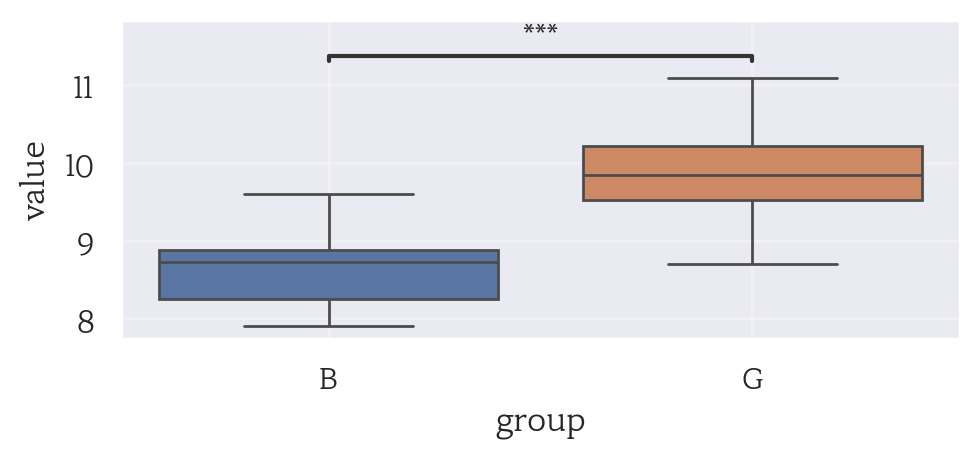

In [19]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.boxplot(data=df, x = 'group', y = 'value', hue = 'group')

annotator = Annotator(ax, data=df, x='group', y='value', pairs=[('B', 'G')])
annotator.configure(test='t-test_ind')
annotator.apply_and_annotate()

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) # 배경 격자 표시/숨김
# 출력
plt.tight_layout()
plt.show()
plt.close()

## 연습문제 - 2

In [26]:
origin = load_data('material')
origin

[data] https://data.hossam.kr/data/lab10_/material.xlsx
[desc] 어떤 화학 약품에 사용되는 서로 다른 상표의 주성분 A 함량표 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,상표1,상표2
0,80.4,81.8
1,78.2,82.7
2,80.1,80.7
3,77.1,84.0
4,79.6,79.0
5,80.4,82.3
6,81.6,81.0
7,79.9,80.2
8,84.4,82.2
9,80.9,82.3


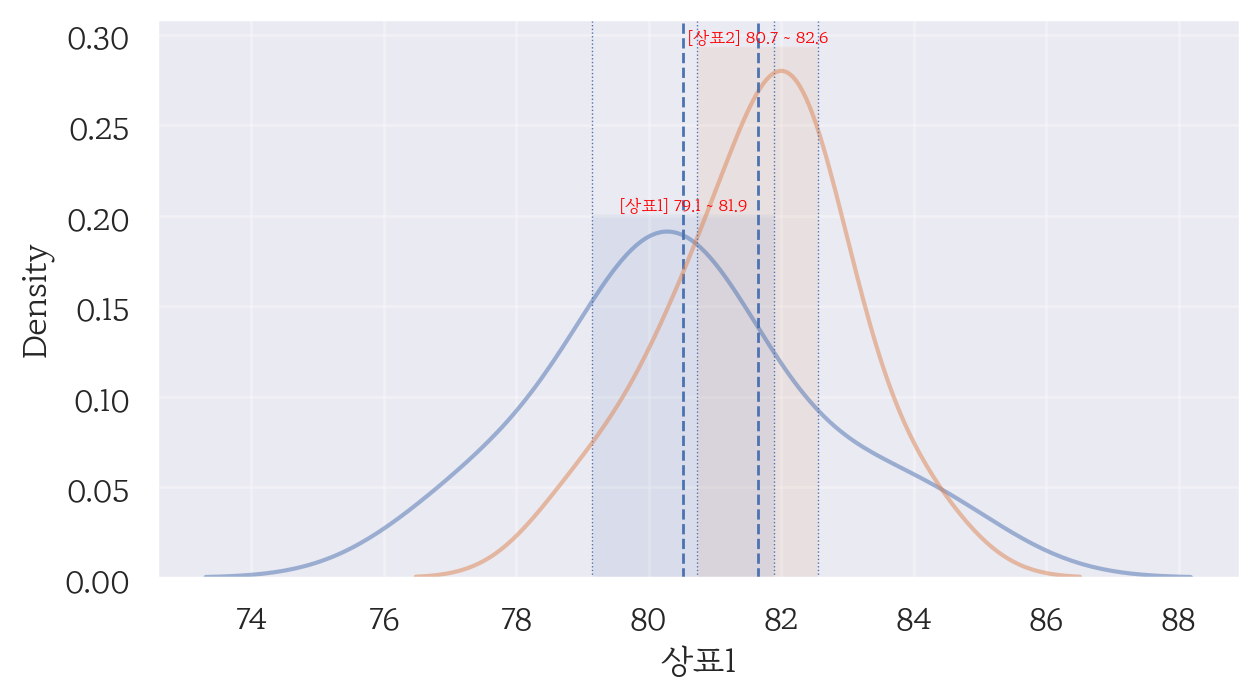

In [21]:
data = origin[['상표1', '상표2']] # 확인할 데이터

# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 720 # 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
# KDE Plot 그리기
 sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

# 신뢰구간
 max = data[c].max() # 최대값
 clevel = 0.95 # 신뢰수준
 dof = len(data[c]) - 1 # 자유도
 sp_mean = data[c].mean() # 표본평균
 sp_std = data[c].std(ddof=1) # 표본표준편차
 sp_std_error = sp_std / sqrt(len(data[c])) # 표본표준오차
 cmin, cmax = t.interval(clevel, dof, loc=sp_mean, 
              scale=sp_std_error)
 ax.axvline(cmin, linestyle=':', linewidth=0.5)
 ax.axvline(cmax, linestyle=':', linewidth=0.5)

# 평균 표시
 ymin, ymax = ax.get_ylim()
 ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
 ax.axvline(sp_mean, linestyle='--', linewidth=1)

# 텍스트 그리기
 ax.text(x=(cmax-cmin)/2+cmin,
         y=ymax,
         s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
         horizontalalignment="center",
         verticalalignment="bottom",
         fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3) # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료

In [22]:
data = origin[['상표1', '상표2']] # 검사하려는 데이터 추출
equal_var_fields = []
normal_dist = True
report = []
for c in data.columns:
    s, p = normaltest(data[c])
    
    normalize = p > 0.05
    report.append({
         "field": c,
         "statistic": s,
         "p-value": p,
         "result": normalize
    })
    normal_dist = normal_dist and normalize

# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
# 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T) # 모든 컬럼의 데이터를 한번에 전달

    else:
        n = "Levene" # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center='median') # 모든 컬럼의 데이터를 한번에 전달
   
    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
   })
report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
상표1,0.638272,0.726777,True
상표2,0.774961,0.678765,True
Bartlett,1.555316,0.212352,True


In [25]:
s, p = ttest_ind(origin['상표1'],origin['상표2']) # '제시된 값', alternative = 'less, greater'       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: -1.528, p-value: 0.142, 귀무가설 채택'

In [27]:
# 검정할 데이터 필드명
fields = ['상표1', '상표2']
# 로그 적용 여부
use_log = False                               # 검정할 데이터
df = origin[fields]

# 검사할 알고리즘
alternative = ["two-sided", "less", "greater"]

# 결과를 저장할 빈 리스트
result = []

# 가설식 템플릿
fmt = "μ({f0}) {0} μ({f1})"

# 등분산성 충족 여부
equal_var = True
for a in alternative:
    if use_log:
       input1 = np.log(df[fields[0]])
       input2 = np.log(df[fields[1]])
    else:
       input1 = df[fields[0]]
       input2 = df[fields[1]]
    s, p = ttest_ind(input1, input2, alternative=a, 
         equal_var=equal_var)
    itp = None
    
    if a == "two-sided":
         itp = fmt.format("==" if p > 0.05 else "==", f0=fields[0], 
         f1=fields[1])
    elif a == "less":
         itp = fmt.format("==" if p > 0.05 else "<", f0=fields[0], 
         f1=fields[1])
    else:
         itp = fmt.format("==" if p > 0.05 else ">", f0=fields[0], 
         f1=fields[1])
 
    result.append({  
         "alternative": a, # 검정의 의미
         "statistic": s, # 통계량
         "p-value": p, # 유의수준
         "H0": p > 0.05, # 귀무가설 채택 여부
         "H1": p <= 0.05, # 대립가설 채택 여부
         "interpretation": itp # 해석 결과
    })
    if a == "two-sided" and p > 0.05:
        break

rdf = DataFrame(result)
rdf.set_index("alternative", inplace=True)
rdf

,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,-1.528327,0.142093,True,False,μ(상표1) == μ(상표2)


In [ ]:
for_

,statistic,p-value,result
field,,,
상표1,0.638272,0.726777,True
상표2,0.774961,0.678765,True
Bartlett,1.555316,0.212352,True


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

상표1 vs. 상표2: t-test independent samples, P_val:1.421e-01 t=-1.528e+00


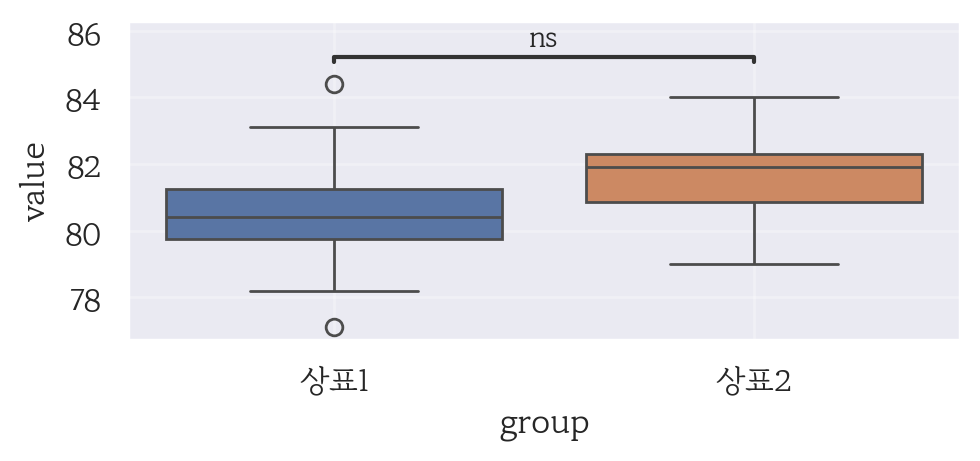

In [34]:
fields = ['상표1','상표2']

# 검정 방법
# `t-test_ind`, `t-test_paired`, `t-test_welch`, `Mann-Whitney`, 
#`Mann-Whitney-gt`, `Mann-Whitney-ls`, `Levene`, `Wilcoxon`, 
#`Kruskal`
test_method = 't-test_ind'

# 데이터 재배치
df = melt(origin[fields], value_vars=fields, var_name='group', value_name='value')

width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.boxplot(data=df, x = 'group', y = 'value', hue = 'group')

annotator = Annotator(ax, data=df, x='group', y='value', pairs=[fields])
annotator.configure(test='t-test_ind')
annotator.apply_and_annotate()

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) # 배경 격자 표시/숨김
# 출력
plt.tight_layout()
plt.show()
plt.close()
